In [306]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas
import statistics as stat

## Experiment measurements (water level at the static pressure gauges)

In [307]:
# hN1 = np.array([[height at node 1 at reading 1 for exp1, ..., 
#                    height at node 1 at reading 6 for exp1],
#
#                   [height at node 1 at reading 1 for exp2, ..., 
#                    height at node 1 at reading 6 for exp2],
#
#                   [height at node 1 at reading 1 for exp3, ..., 
#                    height at node 1 at reading 6 for exp3]])

# Node 1                    
hN1 = np.array([[265, 255, 250, 240, 230, 235],
               [215, 205, 200, 200, 185, 190],
              [128, 125, 123, 120, 120, 115]])


# Node 2
hN2 = np.array([[250, 240, 235, 225, 215, 220], 
               [210, 205, 198, 193, 175, 185], 
               [125, 122, 120, 115, 118, 114]])

# Node 3
hN3 = np.array([[15, 12, 12, 23, 12, 20], 
               [123, 114, 115, 114, 100, 105], 
               [100, 96, 96, 96, 97, 97]])

# Node 4
hN4 = np.array([[160, 152, 148, 148, 138, 145], 
               [173, 163, 158, 160, 145, 152], 
               [112, 108, 107, 107, 108, 104]])

# Node 5
hN5 = np.array([[182, 178, 176, 172, 162, 170], 
               [182, 173, 167, 168, 153, 162], 
               [115, 112, 118, 108, 108, 105]])

# Node 6
hN6 = np.array([[192, 187, 186, 182, 172, 180], 
              [185, 176, 171, 172, 156, 166], 
               [116, 112, 111, 111, 111, 106]])

# Note: All the height above are measured in [mm]

## Experiment measurements (water level at the total head gauge)

In [308]:
# tothead1 = np.array([total head at node 1 for exp1], 
#                     [total head at node 1 for exp2],
#                     [total head at node 1 for exp3])

tothead1 = np.array([[28.2],
                    [22.8],
                    [14]])

tothead2 = np.array([[27.2],
                   [21.6],
                   [13]])

tothead3 = np.array([[26],
                   [21.3],
                   [12.4]])

tothead4 = np.array([[23.5], 
                   [19.4], 
                   [11.8]])

tothead5 = np.array([[22.5],
                   [17.8],
                   [11.4]])

tothead6 = np.array([[21.5],
                   [18.0],
                   [11.4]])

# Note: All the height above are measured in [mm]

## Experiment measurements (Time required to fill 10 litres of water)

In [309]:
# time = np.array([[time required to fill 10 litres of water for exp1], 
#                  [time required to fill 10 litres of water for exp2], 
#                  [time required to fill 10 litres of water for exp3]])

time = np.array([[57.3],
               [108],
               [190]])

# Note: Time is measured in seconds [s]

## Experimental data error analysis 

[1]: “Evaluation of measurement data -Guide to the expression of uncertainty in measurement Évaluation des données de mesure - Guide pour l’expression de l’incertitude de mesure.”. pp: 8-11. Available: https://www.bipm.org/documents/20126/2071204/JCGM_100_2008_E.pdf/cb0ef43f-baa5-11cf-3f85-4dcd86f77bd6 .

### 4.2 Type A evaluation of standard uncertainty

#### Arithmetic mean (4.2.1)
The expected value $\mu_X$ of a quantity X which is a random variable, given n independent observations under the same conditions of measurements, is the arithmetic mean $\overline{X}$: $\newline$
$\overline{X} = \dfrac{1}{n} \sum_{i=1}^n X_i$

In [310]:
def cal_mean(lst):
    """Returns the mean of the measured values of quantity X"""
    res = 0;
    n = len(lst);
    
    for i in lst:
        res += i;
    
    return res / n;  

#### Eperimental Standard Deviation (4.2.2)
To show the variability of the measured values of the quantity X, we use the experimental standard deviation:

$s(x_i) = \sqrt{\dfrac{\sum_{i=1}^n (X_i - \overline{X})^2}{n - 1}}$

In [311]:
def cal_ssd(lst):
    """Returns the sample standard deviation of the measured values of quantity X. """
    
    x_bar = cal_mean(lst)
    x_diff = [(i - x_bar)**2 for i in lst];
    n = len(lst);
    
    tmp = sum(x_diff);
    
    return math.sqrt(tmp / (n - 1));  

#### Experiemental Standard deviation of the mean (4.2.3)
The measurement of the variability of the means (if a experiment consisting of measurements repeated many times, then the distribution of menas has its own standard deviation) is represented by the standard deviation of the means (often called the standard error of the mean) as $s(\overline{X})$

To show the variability of the measured values of the quantity X against the expectation $\mu_x$, we use the experimental standard deviation

$s(\overline{x}) = \dfrac{s(x_i)}{\sqrt{n}}$

In [312]:
def cal_sderr(lst):
    """Returns the sample standard deviation of the mean"""
    
    ssd = cal_ssd(lst)
    
    return (ssd / math.sqrt(n));

## Find the mean for the water level [mm] at each node in the static pressure gauge for each experiment 
### Data are obtained from the photoshots included in the other folders in the same Github repository.

In [313]:
# Experiment 1

height_n1_exp1 = cal_mean(hN1[0])
height_n2_exp1 = cal_mean(hN2[0])
height_n3_exp1 = cal_mean(hN3[0])
height_n4_exp1 = cal_mean(hN4[0])
height_n5_exp1 = cal_mean(hN5[0])
height_n6_exp1 = cal_mean(hN6[0])

exp1WaterLevel = np.array([height_n1_exp1, 
                           height_n2_exp1, 
                           height_n3_exp1, 
                           height_n4_exp1, 
                           height_n5_exp1, 
                           height_n6_exp1])

print("For experiment 1: ")
for i in range(6):
    print(f"The water level at node {i+1} is {exp1WaterLevel[i]} [mm]")

For experiment 1: 
The water level at node 1 is 245.83333333333334 [mm]
The water level at node 2 is 230.83333333333334 [mm]
The water level at node 3 is 15.666666666666666 [mm]
The water level at node 4 is 148.5 [mm]
The water level at node 5 is 173.33333333333334 [mm]
The water level at node 6 is 183.16666666666666 [mm]


In [314]:
# Experiment 2

height_n1_exp2 = cal_mean(hN1[1])
height_n2_exp2 = cal_mean(hN2[1])
height_n3_exp2 = cal_mean(hN3[1])
height_n4_exp2 = cal_mean(hN4[1])
height_n5_exp2 = cal_mean(hN5[1])
height_n6_exp2 = cal_mean(hN6[1])

exp2WaterLevel = np.array([height_n1_exp2, 
                           height_n2_exp2, 
                           height_n3_exp2, 
                           height_n4_exp2, 
                           height_n5_exp2, 
                           height_n6_exp2])

print("For experiment 2: ")
for i in range(6):
    print(f"The water level at node {i+1} is {exp2WaterLevel[i]} [mm]")

For experiment 2: 
The water level at node 1 is 199.16666666666666 [mm]
The water level at node 2 is 194.33333333333334 [mm]
The water level at node 3 is 111.83333333333333 [mm]
The water level at node 4 is 158.5 [mm]
The water level at node 5 is 167.5 [mm]
The water level at node 6 is 171.0 [mm]


In [315]:
# Experiment 3

height_n1_exp3 = cal_mean(hN1[2])
height_n2_exp3 = cal_mean(hN2[2])
height_n3_exp3 = cal_mean(hN3[2])
height_n4_exp3 = cal_mean(hN4[2])
height_n5_exp3 = cal_mean(hN5[2])
height_n6_exp3 = cal_mean(hN6[2])

exp3WaterLevel = np.array([height_n1_exp3, 
                           height_n2_exp3, 
                           height_n3_exp3, 
                           height_n4_exp3, 
                           height_n5_exp3, 
                           height_n6_exp3])

print("For experiment 3: ")
for i in range(6):
    print(f"The water level at node {i+1} is {exp3WaterLevel[i]} [mm]")

For experiment 3: 
The water level at node 1 is 121.83333333333333 [mm]
The water level at node 2 is 119.0 [mm]
The water level at node 3 is 97.0 [mm]
The water level at node 4 is 107.66666666666667 [mm]
The water level at node 5 is 111.0 [mm]
The water level at node 6 is 111.16666666666667 [mm]


## The total head [m^2 / s^2] at each node for each experiment
$\dfrac{u^2}{2} + g z + \dfrac{P}{\rho} = constant$, where the constant is the total head.

In [316]:
for j in range(3):
    print(f"The total head at node 1 for experiment {j+1} {tothead1[j][0]} [m^2 / s^2]")

print("\n")
for j in range(3):
    print(f"The total head at node 2 for experiment {j+1} {tothead2[j][0]} [m^2 / s^2]")
    
print("\n")
for j in range(3):
    print(f"The total head at node 3 for experiment {j+1} {tothead3[j][0]} [m^2 / s^2]")
print("\n")
for j in range(3):
    print(f"The total head at node 4 for experiment {j+1} {tothead4[j][0]} [m^2 / s^2]")

print("\n")
for j in range(3):
    print(f"The total head at node 5 for experiment {j+1} {tothead5[j][0]} [m^2 / s^2]")
    

print("\n")
for j in range(3):
    print(f"The total head at node 6 for experiment {j+1} {tothead6[j][0]} [m^2 / s^2]")

The total head at node 1 for experiment 1 28.2 [m^2 / s^2]
The total head at node 1 for experiment 2 22.8 [m^2 / s^2]
The total head at node 1 for experiment 3 14.0 [m^2 / s^2]


The total head at node 2 for experiment 1 27.2 [m^2 / s^2]
The total head at node 2 for experiment 2 21.6 [m^2 / s^2]
The total head at node 2 for experiment 3 13.0 [m^2 / s^2]


The total head at node 3 for experiment 1 26.0 [m^2 / s^2]
The total head at node 3 for experiment 2 21.3 [m^2 / s^2]
The total head at node 3 for experiment 3 12.4 [m^2 / s^2]


The total head at node 4 for experiment 1 23.5 [m^2 / s^2]
The total head at node 4 for experiment 2 19.4 [m^2 / s^2]
The total head at node 4 for experiment 3 11.8 [m^2 / s^2]


The total head at node 5 for experiment 1 22.5 [m^2 / s^2]
The total head at node 5 for experiment 2 17.8 [m^2 / s^2]
The total head at node 5 for experiment 3 11.4 [m^2 / s^2]


The total head at node 6 for experiment 1 21.5 [m^2 / s^2]
The total head at node 6 for experiment 2 18.0

## Result calculations from experimental data

Assume incompressible flow and no frictional losses, from Bernoulli's Equation
$$
\frac{P_{1}}{\rho g}+\frac{V_{1}^{2}}{2 g}+Z_{1}=\frac{P_{2}}{\rho g}+\frac{V_{2}^{2}}{2 g}+Z_{2}
$$
where Z is the elevation above some arbitary horizontal plane. 

Use of the continuity Equation $\mathrm{Q}=\mathrm{A}_{1} \mathrm{~V}_{1}=\mathrm{A}_{2} \mathrm{~V}_{2}$, equation (1) becomes 

$$
\begin{aligned}
& \frac{P_{1}-P_{2}}{\rho g}+ (Z_{1}-Z_{2}) =\frac{V_{2}^{2}}{2 g}\left[1-\left(\frac{A_{2}}{A_{1}}\right)^{2}\right] \\
& V_{2}=\frac{1}{\sqrt{1-\left(\frac{A_{2}}{A_{1}}\right)^{2}}} \sqrt{2 g\left(\frac{P-P_{2}}{\rho g}+\left(Z_{1}-Z_{2}\right)\right)}
\end{aligned}
$$
The theoretical flow rate is therefore:
$$
Q_{\text {theo }}=A_{2} V_{2}=\frac{A_{2}}{\sqrt{1-\left(\frac{A_{2}}{A_{1}}\right)^{2}}} \sqrt{2 g\left(\frac{P_{1}-P_{2}}{\rho g}+\left(Z_{1}-Z_{2}\right)\right)}
$$

Since the term $\frac{P_{1}-P_{2}}{\rho g}+\left(Z_{1}-Z_{2}\right)$ represents the difference in piezometric  head $(\Delta h)$ between two nodes, in this case nodes 1 and 2. The above expression for $V_{2}$ is obtained based on the assumption of one-dimensipnal frictionless flow. Hence the theoritical flow can be expressed as

$$
Q_{\text {theo }}=A_{2} V_{2}=\frac{A_{2}}{\sqrt{1-\left(\frac{A_{2}}{A_{1}}\right)^{2}}} \sqrt{2 g(\Delta h)}
$$

Thus, 
$$
Q_{\text {theo }}= \sqrt{\dfrac{2 g \Delta h}{\left(\frac{1}{A_{2}^{2}}-\frac{1}{A_{1}^{2}}\right)}} \hspace{1cm} Eq(1)
$$

Because of the above assumptions, the actual flow rate, $Q_{\text {act }}$ differs from $Q_{\text {theo }}$ and the ratio between them is called the discharge coefficient, $\mathrm{C}_{\mathrm{d}}$ which can be written as $$
C_{d}=\frac{Q_{\text {act }}}{Q_{\text {theo }}} \hspace{1cm} Eq(2)
$$


[1]:“Ankara Yıldırım Beyazıt Üniversitesi,” www.aybu.edu.tr. https://www.aybu.edu.tr/bolumroot/contents/muhendislik_makina/files/VENTURIMETER%20EXPERIMENT(1).pdf .



### Difference in the piezometric head (Delta h)

In [317]:
print("For experiment 1:")
exp1deltaH = [];
for i in range(5):
    exp1deltaH.append(exp1WaterLevel[i] - exp1WaterLevel[i+1])
    print(f"The difference in the piezometric head between nodes {i+1}, {i+2} is {exp1deltaH[i]} [mm]")

For experiment 1:
The difference in the piezometric head between nodes 1, 2 is 15.0 [mm]
The difference in the piezometric head between nodes 2, 3 is 215.16666666666669 [mm]
The difference in the piezometric head between nodes 3, 4 is -132.83333333333334 [mm]
The difference in the piezometric head between nodes 4, 5 is -24.833333333333343 [mm]
The difference in the piezometric head between nodes 5, 6 is -9.833333333333314 [mm]


In [318]:
print("For experiment 2:")
exp2deltaH = [];
for i in range(5):
    exp2deltaH.append(exp2WaterLevel[i] - exp2WaterLevel[i+1])
    print(f"The difference in the piezometric head between nodes {i+1}, {i+2} is {exp2deltaH[i]} [mm]")

For experiment 2:
The difference in the piezometric head between nodes 1, 2 is 4.833333333333314 [mm]
The difference in the piezometric head between nodes 2, 3 is 82.50000000000001 [mm]
The difference in the piezometric head between nodes 3, 4 is -46.66666666666667 [mm]
The difference in the piezometric head between nodes 4, 5 is -9.0 [mm]
The difference in the piezometric head between nodes 5, 6 is -3.5 [mm]


In [319]:
print("For experiment 3:")
exp3deltaH = [];
for i in range(5):
    exp3deltaH.append(exp3WaterLevel[i] - exp3WaterLevel[i+1])
    print(f"The difference in the piezometric head between nodes {i+1}, {i+2} is {exp3deltaH[i]} [mm]")

For experiment 3:
The difference in the piezometric head between nodes 1, 2 is 2.8333333333333286 [mm]
The difference in the piezometric head between nodes 2, 3 is 22.0 [mm]
The difference in the piezometric head between nodes 3, 4 is -10.666666666666671 [mm]
The difference in the piezometric head between nodes 4, 5 is -3.3333333333333286 [mm]
The difference in the piezometric head between nodes 5, 6 is -0.1666666666666714 [mm]


### Calculate the theoretical Flow rate

In [320]:
def calTheoG(A1, A2, delh, Z1=0, Z2=0, g=9.81):
    """Returns the theoretical flow rate according to above equation Eq(1)"""
    
    delh = delh * 1e-3
    
    tmp1 = 2 * g * delh;
    #print(f"delh: {delh}")
    tmp2 = (A1**2 - A2**2) / ((A1**2) * (A2**2));
    
    if (A1 == A2): return 'N/A'
    
    return math.sqrt(tmp1 / tmp2);
    #return tmp1 / tmp2


def printing(lst, sysno):
    """print out the theoretical flow rate calculated at each node for 
    different systems"""
    
    for i in range(len(lst)):
        print(f"The theoretical flow rate of system{sysno} at node {i+2}: {lst[i]} [kg/s]")

In [321]:
# Experiment 1 actual flow rate: 10 litres in 57.3 seconds
# [L / s] to [m^3 / s] to [kg / s]
Q_act1 = ((10 / 57.3) / 1000) * 998.02; # [kg / s]

In [322]:
# Experimemt 2 actual flow rate: 10 litres in 108 seconds
# [L / s] to [kg / s]
Q_act2 = ((10 / 108) / 1000) * 998.02; # [kg / s]

In [323]:
# Expereiment 3 actual flow rate: 10 litres in 190 seconds
# [L / s] to [kg / s]
Q_act3 = ((10 / 190) / 1000) * 998.02; # [kg / s]

In [324]:
# Actual flow rates of system 1, 2, and 3
G = [Q_act1, Q_act2, Q_act3]; #[L/s] = [kg/s] for water
for i in range(len(G)):
    print(f"The actual flow rate at system {i+1}: {G[i]} [kg/s]")

The actual flow rate at system 1: 0.17417452006980802 [kg/s]
The actual flow rate at system 2: 0.09240925925925925 [kg/s]
The actual flow rate at system 3: 0.05252736842105263 [kg/s]


In [325]:
# Percentage uncertainty of time measured
perTime = [5 / i for i in [57.3, 108, 190]]

# Percentage uncertainty of volume [L] measured
perVol = [1/10, 1/10, 1/10]

# Total percentage uncertainty in flow rate [kg / s]
perFlow = []
for i in range(3):
    perFlow.append(perVol[i] + perTime[i])
    print(f"The percentage uncertainty of measured flow rate at system {i+1}: {perFlow[i]}") 

The percentage uncertainty of measured flow rate at system 1: 0.18726003490401397
The percentage uncertainty of measured flow rate at system 2: 0.1462962962962963
The percentage uncertainty of measured flow rate at system 3: 0.12631578947368421


From the experimental brief, we know that $A \in \{338.6, 233.5, 84.6, 170.2, 255.2, 338.6\} [mm^2]$ 

In [326]:
A = [i * 1e-6 for i in [338.6, 233.5, 84.6, 170.2, 255.2, 338.6]]; # [mm^2] to [m^2]

Now we want to calculate the theoretical flow rate $Q_{theo}$ according to Eq (1)

$$
Q_{\text {theo }}=\sqrt{\frac{2 g \Delta h}{\left(\frac{1}{A_{2}^{2}}-\frac{1}{A_{1}^{2}}\right)}} \hspace{1cm} Eq(1)
$$

Recall $\frac{P_{1}-P_{2}}{\rho g}+\left(Z_{1}-Z_{2}\right) = \Delta h$ 

Note[1]: [mmH2O] * 9.80665 = [Pa] = $[\frac{kg}{m \cdot s^2}]$ $\newline$

Note[2]: density of water at $21[^\circ C] = 0.99802 [\frac{g}{cm^3}] = 998.02 [\frac{kg}{m^3}]$ $\newline$

[1]: “Centimetre or millimetre of water,” Wikipedia, Dec. 20, 2022. https://en.wikipedia.org/wiki/Centimetre_or_millimetre_of_water (accessed Feb. 18, 2023).

[2]: Water Science School, “Water Density | U.S. Geological Survey,” USGS, Jun. 05, 2018. https://www.usgs.gov/special-topics/water-science-school/science/water-density

In [327]:
# Theoretical Flow rate for system 1
print("For system 1 calculated by difference of piezometric head")

Gtheo1 = []
for i in range(5): 
    #print(i)
    Gtheo1.append(calTheoG(A[i], A[i+1], exp1deltaH[i]))
printing(Gtheo1, 1)

# Absolute uncertainty of G
absFlow = perFlow[0] * G[0]

print(f"\nThe actual flow rate at system {1}: {G[0]} +- {absFlow} [kg/s]")

For system 1 calculated by difference of piezometric head
The theoretical flow rate of system1 at node 2: 0.00017491684601324322 [kg/s]
The theoretical flow rate of system1 at node 3: 0.00018649408502279216 [kg/s]
The theoretical flow rate of system1 at node 4: 0.00015739696782900284 [kg/s]
The theoretical flow rate of system1 at node 5: 0.00015944064063334114 [kg/s]
The theoretical flow rate of system1 at node 6: 0.00017055497183933842 [kg/s]

The actual flow rate at system 1: 0.17417452006980802 +- 0.032615926707662134 [kg/s]


In [328]:
# Theoretical Flow rate for system 2
print("For system 2:")

Gtheo2 = []
for i in range(5): 
    Gtheo2.append(calTheoG(A[i], A[i+1], exp2deltaH[i]))
printing(Gtheo2, 2) 

# Absolute uncertainty of G
absFlow = perFlow[1] * G[1]

print(f"\nThe actual flow rate at system {2}: {G[1]} +- {absFlow} [kg/s]")

For system 2:
The theoretical flow rate of system2 at node 2: 9.929088508895886e-05 [kg/s]
The theoretical flow rate of system2 at node 3: 0.00011547940573587393 [kg/s]
The theoretical flow rate of system2 at node 4: 9.329238945840208e-05 [kg/s]
The theoretical flow rate of system2 at node 5: 9.598486897747356e-05 [kg/s]
The theoretical flow rate of system2 at node 6: 0.0001017531881648915 [kg/s]

The actual flow rate at system 2: 0.09240925925925925 +- 0.013519132373113854 [kg/s]


In [329]:
# Theoretical Flow rate for system 3
print("For system 3:")

Gtheo3 = []
for i in range(5): 
    Gtheo3.append(calTheoG(A[i], A[i+1], exp3deltaH[i]))
printing(Gtheo3, 3)

# Absolute uncertainty of G
absFlow = perFlow[2] * G[2]

print(f"\nThe actual flow rate at system {3}: {G[2]} +- {absFlow} [kg/s]")

For system 3:
The theoretical flow rate of system3 at node 2: 7.602122154933303e-05 [kg/s]
The theoretical flow rate of system3 at node 3: 5.963330869932919e-05 [kg/s]
The theoretical flow rate of system3 at node 4: 4.460229316553943e-05 [kg/s]
The theoretical flow rate of system3 at node 5: 5.841453102015562e-05 [kg/s]
The theoretical flow rate of system3 at node 6: 2.2204366046128886e-05 [kg/s]

The actual flow rate at system 3: 0.05252736842105263 +- 0.006635036011080332 [kg/s]


Recall the discharge coefficient is the ratio between the theoretical and actual flow rate
as in Eq (2)

Because of the above assumptions, the actual flow rate, $Q_{\text {act }}$ differs from $Q_{\text {theo }}$ and the ratio between them is called the discharge coefficient, $\mathrm{C}_{\mathrm{d}}$ which can be written as $$
C_{d}=\frac{Q_{\text {act }}}{Q_{\text {theo }}} \hspace{1cm} Eq(2)
$$

### (Part a) Calibrate the Venturi meter and calculate the discharge coefficient (answered)

In [330]:
def calDischarageCoeff(Gact, Gtheo, uncertainty):
    """The discharage coefficient is the ratio between the
    theoretical flow rate and the actual flow rate"""
            
    Gactlo = Gact - uncertainty
    Gactup = Gact + uncertainty
    
    return [Gactlo / Gtheo, Gact / Gtheo, Gactup / Gtheo];

In [331]:
# Discharge Coefficient of Systems 1, 2, and 3

CD = [];
CD.append(calDischarageCoeff(G[0], Gtheo1[1], perFlow[0] * G[0]))
CD.append(calDischarageCoeff(G[1], Gtheo2[1], perFlow[1] * G[1]))
CD.append(calDischarageCoeff(G[2], Gtheo3[1], perFlow[2] * G[2]))

print("Betweeen node 2 and node 3")
for i in range(len(CD)): 
    val = np.round(CD[i], 4);
    print(f'The dischrage coefficient of system {i+1} [lower limit, value, upper limit]: {val}')

Betweeen node 2 and node 3
The dischrage coefficient of system 1 [lower limit, value, upper limit]: [ 759.0514  933.9413 1108.8311]
The dischrage coefficient of system 2 [lower limit, value, upper limit]: [683.1532 800.2229 917.2925]
The dischrage coefficient of system 3 [lower limit, value, upper limit]: [769.5755 880.8394 992.1033]


### Plot of a box-whisker diagram to show the discharge coefficient of the three experiments

In [332]:
# Cd for experiment 1
exp1Cdm = [G[0]/i for i in Gtheo1]

# (Cd - measuremnt uncertianty) for experiment 1
exp1Cdlo = [calDischarageCoeff(G[0], i, perFlow[0] * G[0])[0] for i in Gtheo1]

# (Cd + measuremnt uncertianty) for experiment 1
exp1Cdup = [calDischarageCoeff(G[0], i, perFlow[0] * G[0])[2] for i in Gtheo1]

exp1Cd = np.concatenate((exp1Cdlo, exp1Cdm, exp1Cdup))

In [333]:
# Cd for experiment 2
exp2Cdm = [G[1]/i for i in Gtheo2]

# (Cd - measuremnt uncertianty) for experiment 2
exp2Cdlo = [calDischarageCoeff(G[1], i, perFlow[1] * G[1])[0] for i in Gtheo2]

# (Cd + measuremnt uncertianty) for experiment 2
exp2Cdup = [calDischarageCoeff(G[1], i, perFlow[1] * G[1])[2] for i in Gtheo2]

exp2Cd = np.concatenate((exp2Cdlo, exp2Cdm, exp2Cdup))

In [334]:
# Cd for experiment 3
exp3Cdm = np.array([G[2]/i for i in Gtheo3])

# (Cd - measuremnt uncertianty) for experiment 3
exp3Cdlo = np.array([calDischarageCoeff(G[2], i, perFlow[2] * G[2])[0] for i in Gtheo3])

# (Cd + measuremnt uncertianty) for experiment 3
exp3Cdup = np.array([calDischarageCoeff(G[2], i, perFlow[2] * G[2])[2] for i in Gtheo3])

exp3Cd = np.concatenate((exp3Cdlo, exp3Cdm, exp3Cdup))

In [335]:
# Calculate the sample mean
mean1Cd = cal_mean(exp1Cd)
mean2Cd = cal_mean(exp2Cd)
mean3Cd = cal_mean(exp3Cd)

In [336]:
# Calculate the experimental standard deviation of the mean
ssd1Cd = cal_ssd(exp1Cd)
ssd2Cd = cal_ssd(exp2Cd)
ssd3Cd = cal_ssd(exp3Cd)

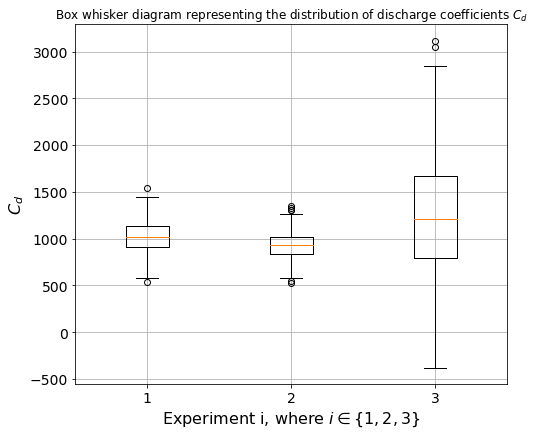

In [337]:
# np.random.normal(mean, standard deviation, number of random generated samples (the larger the better))
d1 = np.random.normal(math.floor(mean1Cd), math.floor(ssd1Cd), 500)
d2 = np.random.normal(math.floor(mean2Cd), math.floor(ssd2Cd), 500)
d3 = np.random.normal(math.floor(mean3Cd), math.floor(ssd3Cd), 500)
d = [d1, d2, d3]

fig = plt.figure(figsize=(6,5))
ax = fig.add_axes([0, 0, 1, 1])

ax.set_xlabel(r'Experiment i, where $i \in \{1, 2, 3\}$',fontsize=16)
ax.set_ylabel(r'$C_d$',fontsize=16,color='black')
ax.tick_params(axis='y', labelsize=14)
ax.tick_params(axis='x', labelsize=14)
ax.grid(True)
plt.title("Box whisker diagram representing the distribution of discharge coefficients $C_d$")

bp = ax.boxplot(d)
plt.show()

From the box whisker diagram, we can see that our discharge coefficient for experiment 1 and 2 largely deviates from the expectation values which is between zero and one. However for experiment 3, there is some values that are in the expectation range. 

Overall, the results are not accurate due to the errors mentioned in the below section.

### (Part a) Do the discharge coefficient experimental values agree with the literature ones ? (answered)

The actual flow rate is much larger than the calculated theoretical flow rate, which is not sensible. 
As the large discharge coefficient suggests that energy is not conserved and there is more energy output as a result. The discharage coefficient according to literature should be between 0 and 1 which suggests the actual flow rate should always be smaller than the calculated theoretical flow rate. 

However, this can be explained since we use the Bernouli's equation which asssumes that liquid is not visious at all (not true); frictionless (not true); no heat transfer or work done on the fluid (not true due to inconsistent pump); steady flow (not true); incompressible fluid (true).




### (Part b) Investigate the pressure changes along the Venturi meter and give a graphical representation of the pressure distribution (answered)

Recall the difference in the piezometric head, exp1deltaH, exp2deltaH, and exp3deltaH.
To calculate the pressure difference, we just need to rearrange the following: 

$\frac{P_{1}-P_{2}}{\rho g}+\left(Z_{1}-Z_{2}\right) = \Delta h$ 

Since $Z_1 = Z_2$, such that $\Delta P = \Delta h \cdot \rho \cdot g$

The conversion factor from Pa to [mmH2O] is 9.80665 [2].
The density of water at 21 [deg C] is at 998.02 [kg / m^3] [3]. 

[2]: “Pa (pascals) to mmH2O Conversion Table,” www.sensorsone.com. https://www.sensorsone.com/pa-to-mmh2o-conversion-table/ (accessed Feb. 18, 2023).

[3]: Water Science School, “Water Density | U.S. Geological Survey,” USGS, Jun. 05, 2018. https://www.usgs.gov/special-topics/water-science-school/science/water-density .

#### Difference in pressure at nodes 1 to 6 for experiments 1, 2, and 3

In [338]:

exp1deltaP = [9.81 * 998.02 * i / 9.80665 for i in exp1deltaH]
exp2deltaP = [9.81 * 998.02 * i / 9.80665 for i in exp2deltaH]
exp3deltaP = [9.81 * 998.02 * i / 9.80665 for i in exp3deltaH]

for i in range(len(exp1deltaP)):
    val = round(exp1deltaP[i], 4)
    print(f"Pressure difference for exp1 between nodes {i+1} and {i+2} is {val} [mmH2O]")
    
print("\n")
for i in range(len(exp2deltaP)):
    val = round(exp2deltaP[i], 4)
    print(f"Pressure difference for exp2 between nodes {i+1} and {i+2}  is {val} [mmH2O]")

print("\n")
for i in range(len(exp3deltaP)):
    val = round(exp3deltaP[i], 4)
    print(f"Pressure difference for exp3 between nodes {i+1} and {i+2}  is {val} [mmH2O]")

Pressure difference for exp1 between nodes 1 and 2 is 14975.4139 [mmH2O]
Pressure difference for exp1 between nodes 2 and 3 is 214813.9931 [mmH2O]
Pressure difference for exp1 between nodes 3 and 4 is -132615.61 [mmH2O]
Pressure difference for exp1 between nodes 4 and 5 is -24792.6297 [mmH2O]
Pressure difference for exp1 between nodes 5 and 6 is -9817.2158 [mmH2O]


Pressure difference for exp2 between nodes 1 and 2  is 4825.4112 [mmH2O]
Pressure difference for exp2 between nodes 2 and 3  is 82364.7766 [mmH2O]
Pressure difference for exp2 between nodes 3 and 4  is -46590.1767 [mmH2O]
Pressure difference for exp2 between nodes 4 and 5  is -8985.2484 [mmH2O]
Pressure difference for exp2 between nodes 5 and 6  is -3494.2632 [mmH2O]


Pressure difference for exp3 between nodes 1 and 2  is 2828.6893 [mmH2O]
Pressure difference for exp3 between nodes 2 and 3  is 21963.9404 [mmH2O]
Pressure difference for exp3 between nodes 3 and 4  is -10649.1832 [mmH2O]
Pressure difference for exp3 between 

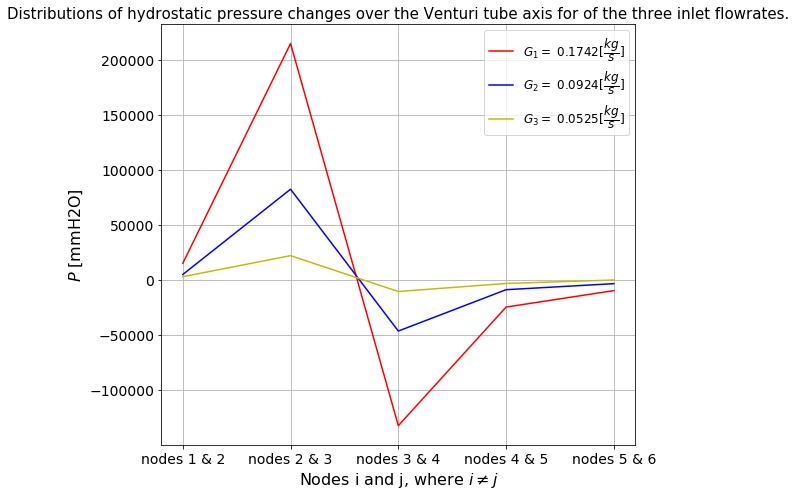

In [339]:
nodes = ["nodes 1 & 2", 
         "nodes 2 & 3", 
         "nodes 3 & 4",
         "nodes 4 & 5",
         "nodes 5 & 6"]
(fig, ax1) = plt.subplots(1, figsize=(10, 7))

ax1.plot(nodes,exp1deltaP,'r-',label='$G_1 =$ '+str(round(G[0], 4)) + '[$\dfrac{kg}{s}$]')
ax1.plot(nodes,exp2deltaP,'b-',label='$G_2 =$ '+str(round(G[1], 4)) + '[$\dfrac{kg}{s}$]')
ax1.plot(nodes,exp3deltaP,'y-',label='$G_3 =$ '+str(round(G[2], 4)) + '[$\dfrac{kg}{s}$]')
ax1.set_xlabel(r'Nodes i and j, where $i \neq j$',fontsize=16)
ax1.set_ylabel(r'$P$ [mmH2O]',fontsize=16,color='black')
ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)
ax1.legend(loc='upper right',fontsize=12)
ax1.grid(True)

plt.title('Distributions of hydrostatic pressure changes over the Venturi tube axis for of the three inlet flowrates.', 
          fontsize=15)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
print('')

## (Part c) Estimate the permanent pressure loss along the Venturi meter. (answered)
$\\\\$
<!-- Basu, Swapan Debnath, Ajay Kumar. (2019). Power Plant Instrumentation and Control Handbook - A Guide to Thermal Power Plants (2nd Edition) - 4.4.2.4 Orifice Plate. (pp. 282, 283, 284, 285). Elsevier. Retrieved from 
https://app.knovel.com/hotlink/pdf/id:kt0122PUY8/power-plant-instrumentation/orifice-plate -->

To measure the permanent pressure loss in a differential pressure flowmeter like the Venturi meter, one can compare the differential pressure meters by the beta ratio which is the ratio of the smallest open area to the laragest open area in the meter. 
$\beta = \dfrac{d}{D}$, where $d$ is the Venturi throat diameter and $D$ is the upstream and downstream pipe diameter.

In our case, $d = \sqrt{\dfrac{A_3 \cdot 4}{\pi}} [mm]$, $D = \sqrt{\dfrac{A_1 \cdot 4}{\pi}} [mm]$, such that the beta ratio [4]: 
$\beta = \dfrac{d}{D} = \sqrt{\dfrac{A_3}{A_1}} = 0.49985$. From figure 2 in [5], we can deduce that there is a 10% premanent pressure loss of the differential pressure created (Venturi with an exit angle of $7^\circ$).

[4]: Basu, Swapan Debnath, Ajay Kumar. (2019). Power Plant Instrumentation and Control Handbook - A Guide to Thermal Power Plants (2nd Edition) - 4.4.2.2 The Venturi Meter. (pp. 283). Elsevier. Retrieved from
https://app.knovel.com/hotlink/pdf/id:kt0122PUW1/power-plant-instrumentation/the-venturi-meter

[5]: S. Ifft, “Permanent Pressure Loss Comparison Among Various Flowmeter Technologies.” Available: http://www.nciweb.net/mccrometer_pdfs/Vc/24508-39.pdf

In [340]:
# The differential pressure created between nodes 1 and 3 for each experiment are: 
diffPexp1 = exp1deltaP[0] + exp1deltaP[1]
diffPexp2 = exp2deltaP[0] + exp2deltaP[1]
diffPexp3 = exp3deltaP[0] + exp3deltaP[1]

# Permanent pressure loss along the Venturi meter for each experiment
PermPloss1 = diffPexp1 * 0.1
PermPloss2 = diffPexp2 * 0.1
PermPloss3 = diffPexp3 * 0.1

print(f"The permanent pressure loss for exp 1: {PermPloss1} [mmH2O]")
print(f"The permanent pressure loss for exp 2: {PermPloss2} [mmH2O]")
print(f"The permanent pressure loss for exp 3: {PermPloss3} [mmH2O]")


The permanent pressure loss for exp 1: 22978.940705541652 [mmH2O]
The permanent pressure loss for exp 2: 8719.018776034629 [mmH2O]
The permanent pressure loss for exp 3: 2479.262972574732 [mmH2O]


## (Part c) Estimate the losses for the same length of pipe if the diameter remains constant (assuming smooth pipe). (answered) 

If the diameter remains constnant, such that the beta ratio is 1. If we also assume that a smooth pipe. 
Then we can use the Darcy friction factor $f$ to find out the pressure loss. 

$f = \dfrac{\Delta P}{P_{dyn}} \cdot \dfrac{d}{L}$, where $P_{dyn} = \dfrac{\rho \cdot \overline{v}^2}{2}$


[5]: tec-science, “Pressure loss in pipe systems (Darcy friction factor),” tec-science, Jul. 01, 2020. https://www.tec-science.com/mechanics/gases-and-liquids/pressure-loss-in-pipe-systems/


#### Pressure Loss $\Delta P$ between nodes 1 and 6 

In [341]:
Pdiff1 = sum(exp1deltaP)
Pdiff2 = sum(exp2deltaP)
Pdiff3 = sum(exp3deltaP)
print(f"Pressure loss between nodes 1 and 6 for exp 1: {Pdiff1} [mmH2O]")
print(f"Pressure loss between nodes 1 and 6 for exp 2: {Pdiff2} [mmH2O]")
print(f"Pressure loss between nodes 1 and 6 for exp 3: {Pdiff3} [mmH2O]")

Pressure loss between nodes 1 and 6 for exp 1: 62563.95152269126 [mmH2O]
Pressure loss between nodes 1 and 6 for exp 2: 28120.49948759258 [mmH2O]
Pressure loss between nodes 1 and 6 for exp 3: 10649.183237904883 [mmH2O]


#### Mean flow velocity

In [342]:
meanV1 = G[0] / A[0]
meanV2 = G[1] / A[0]
meanV3 = G[2] / A[0]
print(f"Mean velocity for exp 1 is {meanV1} [ms^(-1)]")
print(f"Mean velocity for exp 2 is {meanV2} [ms^(-1)]")
print(f"Mean velocity for exp 3 is {meanV3} [ms^(-1)]")

Mean velocity for exp 1 is 514.3961018009687 [ms^(-1)]
Mean velocity for exp 2 is 272.9157095666251 [ms^(-1)]
Mean velocity for exp 3 is 155.1310349115553 [ms^(-1)]


#### Darcy friction factor

In [343]:
def calDarcyf(delP, meanV, d=20.763, L=212, rho=998.02):
    """Return the darcy friction factor"""
    d = d * 1e-3
    Pdy = rho * meanV / 2
    tmp1 = delP * d
    tmp2 = Pdy * L * 1e-3
    return tmp1 / tmp2;

In [344]:
f1 = calDarcyf(Pdiff1, meanV1)
f2 = calDarcyf(Pdiff2, meanV2)
f3 = calDarcyf(Pdiff3, meanV3)

print(f"Darcy friction factor for exp1 is {f1}")
print(f"Darcy friction factor for exp2 is {f2}")
print(f"Darcy friction factor for exp3 is {f3}")

Darcy friction factor for exp1 is 0.02387104856193774
Darcy friction factor for exp2 is 0.020222716309851434
Darcy friction factor for exp3 is 0.013472947092252547


#### Pressure loss in a straight pipe section 
$\Delta p = f \cdot \dfrac{8\rho L}{\pi^2} \cdot \dfrac{G^2}{d^5}$

The pressure loss is inversely proportional to the dimameter to the fifth power. 
The larger the diameter, the lower the pressure drop.
However, the friction factor is depednent on the flow velocity. 
The flow velocity is dependent on the volumetric flow rate and the pipe diameter.

[5]: tec-science, “Pressure loss in pipe systems (Darcy friction factor),” tec-science, Jul. 01, 2020. https://www.tec-science.com/mechanics/gases-and-liquids/pressure-loss-in-pipe-systems/

In [345]:
def calPressureLoss(f, G, d=20.763, L=212, rho=998.02):
    """Return the presure loss"""
    
    d = d * 1e-3
    L = L * 1e-3
    tmp1 = f
    tmp2 = 8 * rho * L / (math.pi**2)
    tmp3 = G**2 / d**5
    return tmp1 * tmp2 * tmp3

In [346]:
p1 = calPressureLoss(f1, G[0])
p2 = calPressureLoss(f2, G[1])
p3 = calPressureLoss(f3, G[2])

print(f"Pressure loss estimate for exp1 is {p1} [mmH2O]")
print(f"Pressure loss estimate for exp2 is {p2} [mmH2O]")
print(f"Pressure loss estimate for exp3 is {p3} [mmH2O]")

Pressure loss estimate for exp1 is 32185152.301597618 [mmH2O]
Pressure loss estimate for exp2 is 7675122.127240458 [mmH2O]
Pressure loss estimate for exp3 is 1652147.123746062 [mmH2O]


## (Part c) Identify the type of flow. (answered)

The reynolds number that represent the flow in the venturi meter [6] can be expressed as:

$Re = \dfrac{4G_{act}}{\pi d \mu}$, where Re is the Reynolds number [n.d.], $\mu$ is the viscosity $[Pa \cdot s]$, d is the throat diameter [m]

The type of flow can be determined by the Moody chart [7]. 

[6]: S. S. Hutagalung, “Estimation Optimal Value of Discharge Coefficient in a Venturi Tubes,” Journal of Physics: Conference Series, vol. 1230, p. 012087, Jul. 2019, doi: https://doi.org/10.1088/1742-6596/1230/1/012087.

[7]: Wikipedia Contributors, “Moody chart,” Wikipedia, Nov. 14, 2019. https://en.wikipedia.org/wiki/Moody_chart.


#### Calculate the Reynolds number for each experiment

In [347]:
def calRey(Gact, d, mu=0.01):
    """Return the Reynolds number of the venturi meter"""
    
    tmp1 = 4 * Gact
    tmp2 = math.pi * d * 1e-3 * mu
        
    return tmp1/tmp2;


def flowtype(R):
    """Determine the flow type by the Moody Chart"""
    if (R <= 2000):
        return "laminar"

    if (R < 2000  and R > 5000):
        return "in transition state"
    
    if (R > 5000):
        return "turbulent"

In [348]:
Re1 = calRey(G[0], 84.6)
Re2 = calRey(G[1], 84.6)
Re3 = calRey(G[2], 84.6)

print(f"The Reynolds number of the Venturi meter for exp1 is {Re1} and flow is {flowtype(Re1)}")
print(f"The Reynolds number of the Venturi meter for exp2 is {Re2} and flow is {flowtype(Re2)}")
print(f"The Reynolds number of the Venturi meter for exp3 is {Re3} and flow is {flowtype(Re3)}")


The Reynolds number of the Venturi meter for exp1 is 262.1346177755884 and flow is laminar
The Reynolds number of the Venturi meter for exp2 is 139.0769777642705 and flow is laminar
The Reynolds number of the Venturi meter for exp3 is 79.05428209758536 and flow is laminar


## (Part d) Estimate the profile of the maximum velocity along the Venturi meter. (answered)

Since the flow is laminar and the pipe is circular. 

If we now assume that no slip boundary conditions at the wall, negligible end effects ($ L >> r_0$), steady state, water has constant viscosity, one-dimensional laminar flow.

We know that from the CENG0003 notes 12 Mic Bal Eq - Momentum Notes (Eq12-28 and Eq12-29), the maximum velocity can be calculated as follows:

$u = u_{max} = \dfrac{r_0^2}{4 \mu} \cdot (-\dfrac{dp}{dx}) \hspace{1cm} \text{Eqn 12-28}$ 

$\dfrac{u}{u_{max}} = 1 - (\dfrac{r}{r_0})^2 \hspace{1cm} \text{Eqn 12-29}$ 


#### Calculate the tube radius at each node

In [374]:
def calRadius(Area):
    """Return the tube radius [mm] given CSA of tube"""
    
    return math.sqrt(Area * 4 / math.pi)


# r = [r1, r2, r3, r4, r5, r6], where ri [mm] is the tube radius at node i
r = [calRadius(i) for i in A]

for i in range(len(r)):
    print(f"The tube radius at node {i+1} is {round(r[i], 4)} [mm]")


The tube radius at node 1 is 0.0208 [mm]
The tube radius at node 2 is 0.0172 [mm]
The tube radius at node 3 is 0.0104 [mm]
The tube radius at node 4 is 0.0147 [mm]
The tube radius at node 5 is 0.018 [mm]
The tube radius at node 6 is 0.0208 [mm]


#### Calculate the velocity at each node

In [375]:
def calmeanV(Q, CSA):
    """Return the velocity [ms^(-1)] at the specified cross sectional area CSA"""

    
    Q /= 998.02; # convert from [kg / s] to [m^3/s]
    
    return Q / CSA


In [376]:
def printing(lst_v, expno):
    """print out the velocity results for each experiment at each node"""
    
    for i in range(len(lst_v)):
        print(f"The velocity at node {i+1} for experiment {expno} is {round(lst_v[i], 2)}[ms^(-1)]")
    print("\n")
    

In [377]:
# Experiment 1
v1 = [calmeanV(G[0], i) for i in A]
printing(v1, 1)

The velocity at node 1 for experiment 1 is 0.52[ms^(-1)]
The velocity at node 2 for experiment 1 is 0.75[ms^(-1)]
The velocity at node 3 for experiment 1 is 2.06[ms^(-1)]
The velocity at node 4 for experiment 1 is 1.03[ms^(-1)]
The velocity at node 5 for experiment 1 is 0.68[ms^(-1)]
The velocity at node 6 for experiment 1 is 0.52[ms^(-1)]




In [378]:
# Experiment 2
v2 = [calmeanV(G[1], i) for i in A]
printing(v2, 2)

The velocity at node 1 for experiment 2 is 0.27[ms^(-1)]
The velocity at node 2 for experiment 2 is 0.4[ms^(-1)]
The velocity at node 3 for experiment 2 is 1.09[ms^(-1)]
The velocity at node 4 for experiment 2 is 0.54[ms^(-1)]
The velocity at node 5 for experiment 2 is 0.36[ms^(-1)]
The velocity at node 6 for experiment 2 is 0.27[ms^(-1)]




In [379]:
# Experiment 3
v3 = [calmeanV(G[2], i) for i in A]
printing(v3, 3)

The velocity at node 1 for experiment 3 is 0.16[ms^(-1)]
The velocity at node 2 for experiment 3 is 0.23[ms^(-1)]
The velocity at node 3 for experiment 3 is 0.62[ms^(-1)]
The velocity at node 4 for experiment 3 is 0.31[ms^(-1)]
The velocity at node 5 for experiment 3 is 0.21[ms^(-1)]
The velocity at node 6 for experiment 3 is 0.16[ms^(-1)]




### Calculate the maximum velocity at each node

Recall $\dfrac{u}{u_{max}} = 1 - (\dfrac{r}{r_0})^2 \hspace{1cm} \text{Eqn 12-29}$ 


In [380]:
def cal_umax(u, r, r0=0.020763403137427305):
    """Return the maximum velocity [ms^(-1)] at each node"""
    
    tmp1 = 1 - (r/r0)**2
    if (tmp1 == 0): return u
    return u / tmp1


In [381]:
def printing1(lst_v, expno):
    """print out the maximum velocity results for each experiment at each node"""
    
    for i in range(len(lst_v)):
        print(f"The maximum velocity at node {i+1} for experiment {expno} is {round(lst_v[i], 2)}[ms^(-1)]")
    print("\n")

In [382]:
# Experiment 1
vmax1 = []
for i in range(6):
    vmax1.append(cal_umax(v1[i], r[i]))
    
printing1(vmax1, 1)

The maximum velocity at node 1 for experiment 1 is 0.52[ms^(-1)]
The maximum velocity at node 2 for experiment 1 is 2.41[ms^(-1)]
The maximum velocity at node 3 for experiment 1 is 2.75[ms^(-1)]
The maximum velocity at node 4 for experiment 1 is 2.06[ms^(-1)]
The maximum velocity at node 5 for experiment 1 is 2.78[ms^(-1)]
The maximum velocity at node 6 for experiment 1 is 0.52[ms^(-1)]




In [383]:
# Experiment 2
vmax2 = []
for i in range(6):
    vmax2.append(cal_umax(v2[i], r[i]))
    
printing1(vmax2, 2)

The maximum velocity at node 1 for experiment 2 is 0.27[ms^(-1)]
The maximum velocity at node 2 for experiment 2 is 1.28[ms^(-1)]
The maximum velocity at node 3 for experiment 2 is 1.46[ms^(-1)]
The maximum velocity at node 4 for experiment 2 is 1.09[ms^(-1)]
The maximum velocity at node 5 for experiment 2 is 1.47[ms^(-1)]
The maximum velocity at node 6 for experiment 2 is 0.27[ms^(-1)]




In [384]:
# Experiment 3
vmax3 = []
for i in range(6):
    vmax3.append(cal_umax(v3[i], r[i]))
    
printing1(vmax3, 3)

The maximum velocity at node 1 for experiment 3 is 0.16[ms^(-1)]
The maximum velocity at node 2 for experiment 3 is 0.73[ms^(-1)]
The maximum velocity at node 3 for experiment 3 is 0.83[ms^(-1)]
The maximum velocity at node 4 for experiment 3 is 0.62[ms^(-1)]
The maximum velocity at node 5 for experiment 3 is 0.84[ms^(-1)]
The maximum velocity at node 6 for experiment 3 is 0.16[ms^(-1)]




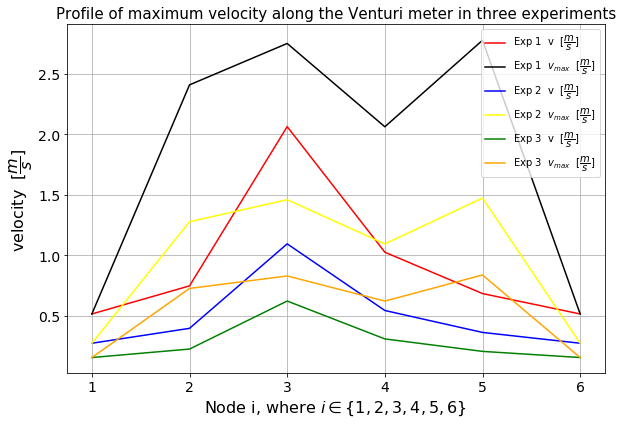

In [385]:
nodes = [1, 2, 3, 4, 5, 6] 

(fig, ax1) = plt.subplots(1, figsize=(9, 6))

color = ['red', 'black', 'blue', 'yellow', 'green', 'orange']    

ax1.plot(nodes,v1,color[0], label='Exp 1  v' + '  [$\dfrac{m}{s}$]')
ax1.plot(nodes,vmax1,color[1], label='Exp 1  $v_{max}$'+ '  [$\dfrac{m}{s}$]')

ax1.plot(nodes,v2,color[2], label='Exp 2  v' + '  [$\dfrac{m}{s}$]')
ax1.plot(nodes,vmax2,color[3], label='Exp 2  $v_{max}$'+ '  [$\dfrac{m}{s}$]')

ax1.plot(nodes,v3,color[4], label='Exp 3  v' + '  [$\dfrac{m}{s}$]')
ax1.plot(nodes,vmax3,color[5], label='Exp 3  $v_{max}$'+ '  [$\dfrac{m}{s}$]')


ax1.set_xlabel(r'Node i, where $i \in \{1, 2, 3, 4, 5, 6\}$',fontsize=16)
ax1.set_ylabel(r'velocity  '+'$[\dfrac{m}{s}]$ ',fontsize=16,color='black')

ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True)

plt.title('Profile of maximum velocity along the Venturi meter in three experiments', fontsize=15)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
print('')


## (Part d) Calculate the maximum and average velocity at different locations and Reynolds numbers from theory. (answered)

From theory, we will use the theoretical calculated flow rate, found in part A instead. But the calculations should be the same.


#### Calculate the thoretical average velocity at each node for three experiments

In [409]:
def printing2(lst, expno):
    """print out the average velocity results for part d in theory"""
    for i in range(len(lst)):
        print(f"Theoretical average velocity at node {i+1} for {expno} is {round(lst[i], 4)} [ms^(-1)]")
    

In [410]:
# Experiment 1
vtheo1 = [(Gtheo1[4]/988.02/A[0])] # [kg / s] to [m^3/ s] then divide by [m^2]
for i in range(5):
    vtheo1.append(Gtheo1[i]/988.02/A[i+1])
    #print(f"Theoretical average velocity at node {i+1]}")
    
printing2(vtheo1, 1)

Theoretical average velocity at node 1 for 1 is 0.0005 [ms^(-1)]
Theoretical average velocity at node 2 for 1 is 0.0008 [ms^(-1)]
Theoretical average velocity at node 3 for 1 is 0.0022 [ms^(-1)]
Theoretical average velocity at node 4 for 1 is 0.0009 [ms^(-1)]
Theoretical average velocity at node 5 for 1 is 0.0006 [ms^(-1)]
Theoretical average velocity at node 6 for 1 is 0.0005 [ms^(-1)]


In [411]:
# Experiment 2
vtheo2 = [(Gtheo2[4]/988.02/A[0])] # [kg / s] to [m^3/ s] then divide by [m^2]
for i in range(5):
    vtheo2.append(Gtheo2[i]/988.02/A[i+1])
    #print(f"Theoretical average velocity at node {i+1]}")
    
printing2(vtheo2, 2)

Theoretical average velocity at node 1 for 2 is 0.0003 [ms^(-1)]
Theoretical average velocity at node 2 for 2 is 0.0004 [ms^(-1)]
Theoretical average velocity at node 3 for 2 is 0.0014 [ms^(-1)]
Theoretical average velocity at node 4 for 2 is 0.0006 [ms^(-1)]
Theoretical average velocity at node 5 for 2 is 0.0004 [ms^(-1)]
Theoretical average velocity at node 6 for 2 is 0.0003 [ms^(-1)]


In [412]:
# Experiment 3
vtheo3 = [(Gtheo3[4]/988.02/A[0])] # [kg / s] to [m^3/ s] then divide by [m^2]
for i in range(5):
    vtheo3.append(Gtheo3[i]/988.02/A[i+1])
    #print(f"Theoretical average velocity at node {i+1]}")
    
printing2(vtheo3, 3)

Theoretical average velocity at node 1 for 3 is 0.0001 [ms^(-1)]
Theoretical average velocity at node 2 for 3 is 0.0003 [ms^(-1)]
Theoretical average velocity at node 3 for 3 is 0.0007 [ms^(-1)]
Theoretical average velocity at node 4 for 3 is 0.0003 [ms^(-1)]
Theoretical average velocity at node 5 for 3 is 0.0002 [ms^(-1)]
Theoretical average velocity at node 6 for 3 is 0.0001 [ms^(-1)]


#### Calculate the theoretical maximum velocity at each node for three experiments

In [413]:
def printing3(lst, expno):
    """print out the maximum velocity results for part d in theory"""
    for i in range(len(lst)):
        print(f"Theoretical maximum velocity at node {i+1} for {expno} is {round(lst[i], 4)} [ms^(-1)]")
    

In [414]:
# Experiment 1
vtheomax1 = []
for i in range(6):
    vtheomax1.append(cal_umax(vtheo1[i], r[i]))
    
printing3(vtheomax1, 1)

Theoretical maximum velocity at node 1 for 1 is 0.0005 [ms^(-1)]
Theoretical maximum velocity at node 2 for 1 is 0.0024 [ms^(-1)]
Theoretical maximum velocity at node 3 for 1 is 0.003 [ms^(-1)]
Theoretical maximum velocity at node 4 for 1 is 0.0019 [ms^(-1)]
Theoretical maximum velocity at node 5 for 1 is 0.0026 [ms^(-1)]
Theoretical maximum velocity at node 6 for 1 is 0.0005 [ms^(-1)]


In [415]:
# Experiment 2
vtheomax2 = []
for i in range(6):
    vtheomax2.append(cal_umax(vtheo2[i], r[i]))
    
printing3(vtheomax2, 2)

Theoretical maximum velocity at node 1 for 2 is 0.0003 [ms^(-1)]
Theoretical maximum velocity at node 2 for 2 is 0.0014 [ms^(-1)]
Theoretical maximum velocity at node 3 for 2 is 0.0018 [ms^(-1)]
Theoretical maximum velocity at node 4 for 2 is 0.0011 [ms^(-1)]
Theoretical maximum velocity at node 5 for 2 is 0.0015 [ms^(-1)]
Theoretical maximum velocity at node 6 for 2 is 0.0003 [ms^(-1)]


In [416]:
# Experiment 3
vtheomax3 = []
for i in range(6):
    vtheomax3.append(cal_umax(vtheo3[i], r[i]))
    
printing3(vtheomax3, 3)

Theoretical maximum velocity at node 1 for 3 is 0.0001 [ms^(-1)]
Theoretical maximum velocity at node 2 for 3 is 0.0011 [ms^(-1)]
Theoretical maximum velocity at node 3 for 3 is 0.001 [ms^(-1)]
Theoretical maximum velocity at node 4 for 3 is 0.0005 [ms^(-1)]
Theoretical maximum velocity at node 5 for 3 is 0.0009 [ms^(-1)]
Theoretical maximum velocity at node 6 for 3 is 0.0001 [ms^(-1)]


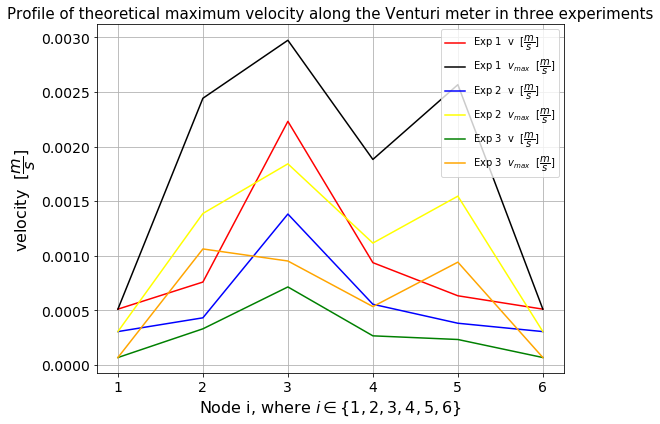

In [417]:
nodes = [1, 2, 3, 4, 5, 6] 

(fig, ax1) = plt.subplots(1, figsize=(9, 6))

color = ['red', 'black', 'blue', 'yellow', 'green', 'orange']    

ax1.plot(nodes,vtheo1,color[0], label='Exp 1  v' + '  [$\dfrac{m}{s}$]')
ax1.plot(nodes,vtheomax1,color[1], label='Exp 1  $v_{max}$'+ '  [$\dfrac{m}{s}$]')

ax1.plot(nodes,vtheo2,color[2], label='Exp 2  v' + '  [$\dfrac{m}{s}$]')
ax1.plot(nodes,vtheomax2,color[3], label='Exp 2  $v_{max}$'+ '  [$\dfrac{m}{s}$]')

ax1.plot(nodes,vtheo3,color[4], label='Exp 3  v' + '  [$\dfrac{m}{s}$]')
ax1.plot(nodes,vtheomax3,color[5], label='Exp 3  $v_{max}$'+ '  [$\dfrac{m}{s}$]')


ax1.set_xlabel(r'Node i, where $i \in \{1, 2, 3, 4, 5, 6\}$',fontsize=16)
ax1.set_ylabel(r'velocity  '+'$[\dfrac{m}{s}]$ ',fontsize=16,color='black')

ax1.tick_params(axis='y', labelsize=14)
ax1.tick_params(axis='x', labelsize=14)

ax1.legend(loc='upper right', fontsize=10)
ax1.grid(True)

plt.title('Profile of theoretical maximum velocity along the Venturi meter in three experiments', fontsize=15)
fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()
print('')

### Calculate the Reynolds number from Theory
From CENG0003, 14 Turbulent Flow notes, we know that the reynolds number can be calculated as: 
$Re = \dfrac{\rho \overline{u} d}{\mu}$

In [425]:
def cal_ReynoldsTheory(meanV, d, rho=998.02, mu=0.01):
    """Return the Reynolds number at each node """
    return rho * meanV * d / mu

In [426]:
# Experiment 1
Rtheo1 = [];
for i in range(len(r)):
    Rtheo1.append(cal_ReynoldsTheory(v1[i], 2 * r[i]*1e-3))
    print(f"Reynolds number calculated at node {i+1} for exp1 is {Rtheo1[i]}")

Reynolds number calculated at node 1 for exp1 is 2.1361227268029217
Reynolds number calculated at node 2 for exp1 is 2.572327348301304
Reynolds number calculated at node 3 for exp1 is 4.27350775100482
Reynolds number calculated at node 4 for exp1 is 3.012935951675136
Reynolds number calculated at node 5 for exp1 is 2.460533840980546
Reynolds number calculated at node 6 for exp1 is 2.1361227268029217


In [427]:
# Experiment 2
Rtheo2 = [];
for i in range(len(r)):
    Rtheo2.append(cal_ReynoldsTheory(v2[i], 2 * r[i]*1e-3))
    print(f"Reynolds number calculated at node {i+1} for exp2 is {Rtheo2[i]}")

Reynolds number calculated at node 1 for exp2 is 1.1333317800537723
Reynolds number calculated at node 2 for exp2 is 1.3647625653487474
Reynolds number calculated at node 3 for exp2 is 2.2673332790053347
Reynolds number calculated at node 4 for exp2 is 1.5985299076943085
Reynolds number calculated at node 5 for exp2 is 1.3054498989646786
Reynolds number calculated at node 6 for exp2 is 1.1333317800537723


In [428]:
# Experiment 3
Rtheo3 = [];
for i in range(len(r)):
    Rtheo3.append(cal_ReynoldsTheory(v3[i], 2 * r[i]*1e-3))
    print(f"Reynolds number calculated at node {i+1} for exp3 is {Rtheo3[i]}")

Reynolds number calculated at node 1 for exp3 is 0.6442096433989866
Reynolds number calculated at node 2 for exp3 is 0.7757597739877089
Reynolds number calculated at node 3 for exp3 is 1.2887999691188219
Reynolds number calculated at node 4 for exp3 is 0.9086380527946594
Reynolds number calculated at node 5 for exp3 is 0.7420452057272909
Reynolds number calculated at node 6 for exp3 is 0.6442096433989866


## (Part d) Where are the deviations from the theoretical predictions attributed? (answered)

Comparing the actual reynolds and the theoretical predictions. There is a huge discrepancy between the reynolds number obtained which differs by two orders of magnitude. This is due to the reason that the experimental measured flow rate and the theoretical computed flow rate is very different.

However, beside this difference, there is no other deviations given there are no other independent varaibles that would affect the results, the theoretical predictions.

## (Part d) Compare the converging and diverging sections of the Venturi meter in terms of velocity, total head, and energy losses.

The converging section of the Venturi meter has a bend angle of $21^\circ$ and the diverging section has a bend angle of $8^\circ$.

And so far we have either measured or computed the total head, velocity at each node of the meter.

In general, the velocity at the converging section is higher than that of the diverging section. 
We also know that although the pressure changes are more significant in the converging section, it is increasing, such that there is less friction loss as friction loss is inversely proportional to the diameter. If the velocity increases, the diameter should decreases, such that there is less frictional losss. 

Whereas in the diverging section, the tube diameter is larger and we can see in the previous graph Distributions of hydrostatic pressure changes over the Venturi tube axis for of the three inlet flowrates.', such that for nodes 3 and 4 afterwards, hydrostatic pressure changes are negative.

From our measured total head experimental data, we can also see that for all three experiments, the total head decreases as the node number increases which implies energy loss as the fluid passes through the venturi meter. 
